In [27]:
import tensorflow as tf
print(tf.__version__)

1.14.0


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Builds the Sequential feedforward neural network model
model = Sequential()
model.add(Flatten(input_shape=(28, 28))) # flattens image 28x28 to 1d array of 784
model.add(Dense(16, activation="relu", name="first_hidden_layer_1"))
model.add(Dense(16, activation="relu"))
model.add(Dense(10, activation="softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
# Prints the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
first_hidden_layer_1 (Dense) (None, 16)                12560     
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [6]:
# Builds the Sequential convolutional neural network model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(32, 32, 3)))
# same is: Conv2D(16, kernel_size=3, activation="relu", ...)
    # ^^ kernel of shape 3x3 convalutes / goes over image using 16 filters
    # ^^ input shape is 32x32 with 3 color channels
    # ^^ can also add argument: strides=2   to stride / step-size with kernel by 2 in each dimension
model.add(MaxPooling2D((3, 3))) # Pooling window size 3x3
# same is: MaxPooling2D(pool_size=3)
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [7]:
# Prints the model summary
model.summary()
# After Conv2D layer: output is of shape 30x30 x16 (filters), because has by default no 0 padding
    # provide as argument to Conv2D padding="Same" to keep 32x32 x16
# After MaxPool 3x3: output 10x10 x16
# After Flatten: 1600

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 103,562
Trainable params: 103,562
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [8]:
# Defines the model optimizer, loss function and metrics
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy", # loss is calculated for each epoch of training
             metrics=["accuracy", "mae"]) # metrics are calculated for each epoch of training
# or if further parameters have to be set
#model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,
#                                                momentum=0.9,
#                                                nesterov=True),
#              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=[tf.keras.metrics.BinaryAccuracy(threshold=0.7),
#                      tf.keras.metrics.MeanAbsoluteError()])
                                               
# optimizer: "adam", "rmsprop", "adadelta"
# loss: "sparse_categorical_crossentropy" (if labels are integers, e.g., label two is a 2), 
    #"categorical_crossentropy" (if labels are one-hot vectors, e.g., label two is [0010000000] and label 1 is [0100000000]), "mean_squared_error"
# metrics: mae = mean absolute error

In [9]:
# Prints the resulting model attributes
print(model.loss)
print(model.optimizer, model.optimizer.lr)
print(model.metrics)

sparse_categorical_crossentropy
<tensorflow.python.keras.optimizer_v2.adam.Adam object at 0x0000024E540F0D08> <tf.Variable 'learning_rate:0' shape=() dtype=float32>
[<tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x0000024E540F0EC8>, <tensorflow.python.keras.metrics.MeanMetricWrapper object at 0x0000024E540E1C48>]


In [10]:
# Uses this model for the fashin_mnist_data set
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D((3, 3)))
model.add(Flatten())
model.add(Dense(10, activation="softmax"))

opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss="sparse_categorical_crossentropy",
             metrics=[acc, mae])

***
<a id="coding_tutorial_4"></a>
## The fit method

In [11]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [12]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [13]:
# Prints the dimension(s), shape, and size of the training data
print("--- Train images ---")
print("Dimension(s): {}; shape: {}; size: {}".format(train_images.ndim, 
                                                  train_images.shape, # contains 60000 images of shape 28x28
                                                  train_images.size))
print("--- Train labels ---")
print("Dimension(s): {}; shape: {}; size: {}".format(train_labels.ndim, 
                                                  train_labels.shape,
                                                  train_labels.size))

print(train_images[0, :, :]) # Shows grayscale pixel values of first 28x28 image
# or simply 
#print(train_images[0])

--- Train images ---
Dimension(s): 3; shape: (60000, 28, 28); size: 47040000
--- Train labels ---
Dimension(s): 1; shape: (60000,); size: 60000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0

In [14]:
# Defines the labels, labels are values from 0 to 9, 0 = T-shirt/top, 1 = Trouser, ...

labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

print(train_labels[0], train_labels[1]) # First image is a 9 = Ankle boot, second image 0 = T-shirt/top

9 0


In [15]:
# Rescales the image values so that they lie in between 0 and 1
train_images = train_images / 255.0 # rescales by largest value
test_images = test_images / 255.0

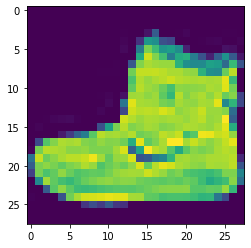

label: Ankle boot


In [16]:
# Displays one of the images
i = 0
img = train_images[i, :, :] # Grayscale pixel values of first 28x28 image
plt.imshow(img)
plt.show()
print("label: {}".format(labels[train_labels[i]]))

#### Fit the model

In [17]:
# Fit the model
    # train_images[..., np.newaxis] makes (60000, 28, 28) to (60000, 28, 28, 1)
history = model.fit(train_images[..., np.newaxis], train_labels, epochs=5, batch_size=256)
    #^^ history will be a dictionary that includes values for loss and metrics over training

Epoch 1/5
60000/60000 [==============================] - 19s 311us/sample - loss: 0.5504 - sparse_categorical_accuracy: 0.8099 - mean_absolute_error: 4.4200
Epoch 2/5
60000/60000 [==============================] - 18s 298us/sample - loss: 0.3718 - sparse_categorical_accuracy: 0.8688 - mean_absolute_error: 4.4200
Epoch 3/5
60000/60000 [==============================] - 17s 289us/sample - loss: 0.3412 - sparse_categorical_accuracy: 0.8792 - mean_absolute_error: 4.4200
Epoch 4/5
60000/60000 [==============================] - 17s 290us/sample - loss: 0.3209 - sparse_categorical_accuracy: 0.8863 - mean_absolute_error: 4.4200
Epoch 5/5
60000/60000 [==============================] - 18s 293us/sample - loss: 0.3097 - sparse_categorical_accuracy: 0.8883 - mean_absolute_error: 4.4200


#### Plot training history

In [18]:
# Loads the history into a pandas Dataframe
df = pd.DataFrame(history.history)
df.head() # each row is one epoch

,loss,sparse_categorical_accuracy,mean_absolute_error
0,0.550404,0.809917,4.420000
1,0.371774,0.868833,4.419999
2,0.341201,0.879250,4.420000
3,0.320866,0.886300,4.419999
4,0.309717,0.888283,4.420001


[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

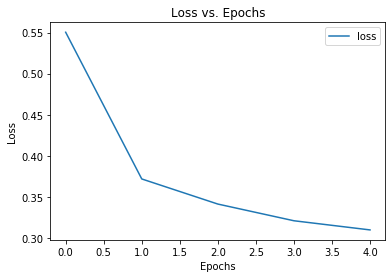

In [19]:
# Makes a plot for the loss
loss_plot = df.plot(y="loss", title="Loss vs. Epochs")
loss_plot.set(xlabel="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

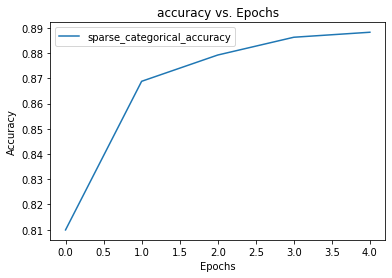

In [20]:
# Makes a plot for the accuracy
acc_plot = df.plot(y="sparse_categorical_accuracy", title="accuracy vs. Epochs")
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Mean absolute error'), Text(0.5, 0, 'Epochs')]

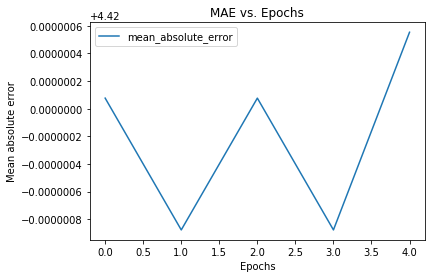

In [21]:
# Makes a plot for the additional metric
mae_plot = df.plot(y="mean_absolute_error", title="MAE vs. Epochs")
mae_plot.set(xlabel="Epochs", ylabel="Mean absolute error")

***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [22]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [23]:
# Evaluates the model
test_loss, test_accuracy, test_mae = model.evaluate(test_images[..., np.newaxis], test_labels)

10000/10000 [==============================] - 2s 178us/sample - loss: 0.3362 - sparse_categorical_accuracy: 0.8810 - mean_absolute_error: 4.4200


#### Make predictions from the model

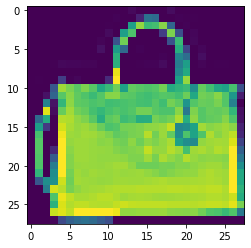

Label: Bag


In [24]:
# Chooses a random test image

index = 30 # 'random' test image

test_image = test_images[index]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[index]]}")

In [25]:
# Gets the model predictions
print("Test image shape", test_image.shape)
print("Test image shape - increased dimensions", test_image[np.newaxis, ..., np.newaxis].shape)
predictions = model.predict(test_image[np.newaxis, ..., np.newaxis]) # Makes (28, 28) to (1, 28, 28, 1)
print(predictions) # Adds up to 1, because of softmax activation function in last / output layer
print("Model predicts label", np.argmax(predictions), f"which equals: {labels[np.argmax(predictions)]}")

Test image shape (28, 28)
Test image shape - increased dimensions (1, 28, 28, 1)
[[1.2218548e-08 1.5506714e-11 1.1159741e-07 8.7465423e-08 8.3829740e-08
  5.0100818e-10 1.6120589e-07 1.9123716e-10 9.9999952e-01 1.3013605e-11]]
Model predicts label 8 which equals: Bag
